# A simple linkedin analysis using archive data
### by Moein Nikpour
##### Email : nikpourmoein@gmail.com
##### Linkedin : https://www.linkedin.com/in/moeinnikpour/
#### Date : 05/01/20 

# Learn More : https://virgool.io/@moeinnikpour/linkedin-analytics-ql09iexanpav

## Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## Reading data from csv files downloaded from linkedin "Archive data"

In [3]:
df_connections = pd.read_csv ('Connections.csv')
df_invitations = pd.read_csv ('Invitations.csv')

In [ ]:
df_connections.head(10)

In [ ]:
df_connections['Position'].value_counts().head(20)

In [ ]:
df_invitations.head(10)

# Creating a wordcloud for position of connections

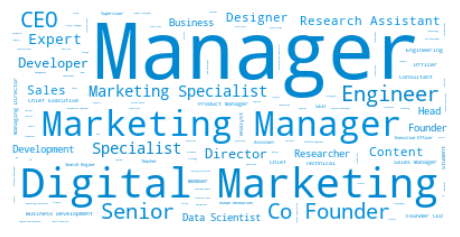

In [16]:
positions = df_connections.dropna(axis = 0,subset = ['Position'])['Position'].values
positions_string = ''
for pos in positions:
    pos = str (pos)
    pos = pos.replace (' ','-')
    positions_string = positions_string + ' '+pos+ ' '
    #print (type (pos))

stopwords = set(STOPWORDS)

# you can use a mask to shape the wordcloud. uncomment if you want:
#linkedin_mask = np.array(Image.open('LinkedIn_logo_initials.png'))


positions_wc = WordCloud(
    background_color='white',
    max_words=5000,
    max_font_size = 70,
    min_font_size = 2,
    stopwords=stopwords,
    margin=10,
    random_state=1,
    #mask = linkedin_mask
)

# generate the word cloud
positions_wc.generate(positions_string)

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(201,99%%, %d%%)" % np.random.randint(40,45))

positions_wc.recolor(color_func = grey_color_func)


fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(8) # set height

# display the cloud
plt.imshow(positions_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
positions_wc.to_file('linekdin_connections_position.png')


# Plotting a Barchart for positions of connections

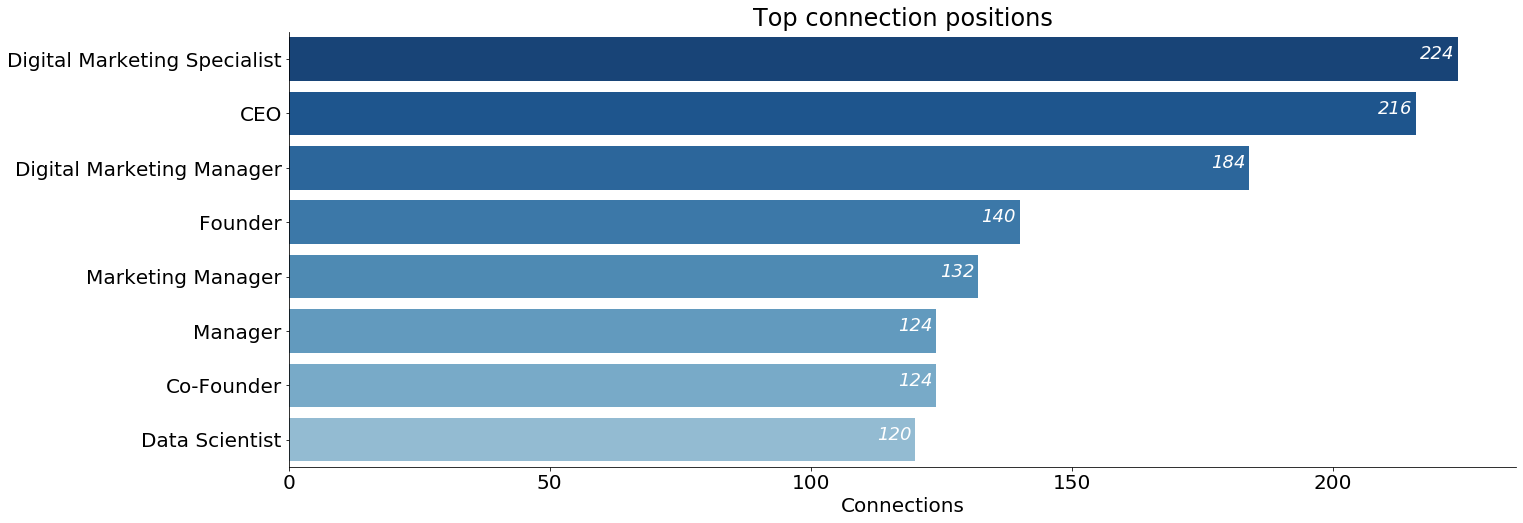

In [9]:
df_positions = pd.DataFrame (df_connections['Position'].value_counts().head(20))
df_positions.reset_index (inplace = True)
df_positions.rename (columns = {'Position':'Count','index':'Position'},inplace = True)
df_positions ['Count']= df_positions ['Count']

plt.figure (figsize = (22,8))
palette =reversed(  sns.color_palette("Blues",n_colors=13))
ax = sns.barplot (y='Position',x = 'Count',data = df_positions.head (8), palette=palette,orient='h')

for i, index in enumerate (df_positions.head (8).index):
        label = df_positions.loc[index,'Count']
        ax.text(label-4,i, round(label, 2), color='white', ha="center",style = 'oblique',fontsize=18)
       

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)

ax.xaxis.set_visible(True)
ax.set_ylabel(None)
ax.tick_params(labelsize=20)
ax.set_xlabel('Connections',fontsize=20)

plt.title ('Top connection positions',fontsize = 24)
plt.show()


# Connection position type by time

/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


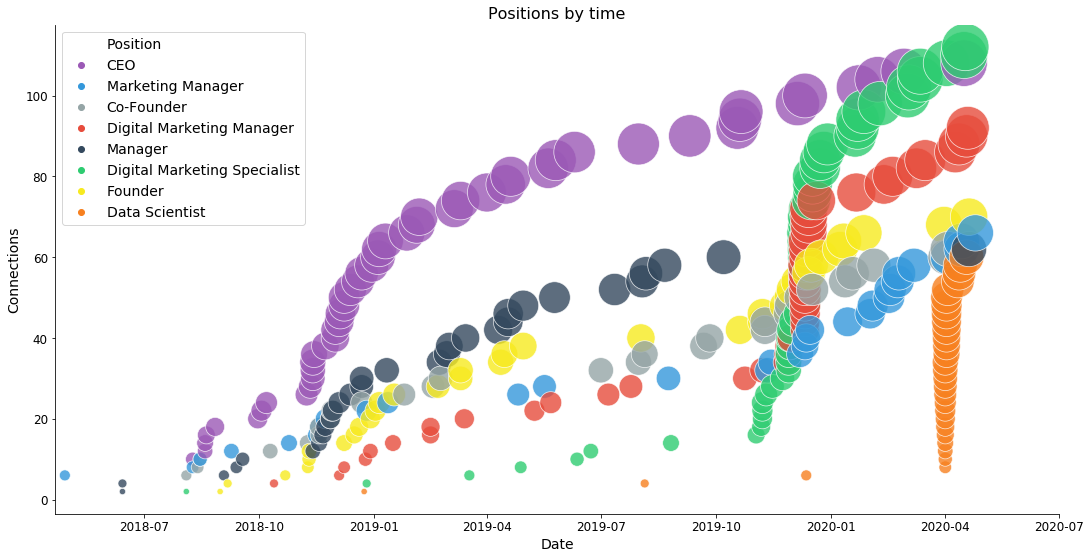

In [10]:
df_pos_time = df_connections [['Position','Connected On']]
df_pos_time.head ()
df_pos_time['Connected On']= pd.to_datetime(df_pos_time['Connected On']) 

df_pos_time.dropna(axis =0,inplace = True)

df_pos_time = pd.merge(left=df_pos_time, right=df_positions.head(8), left_on='Position', right_on='Position')
df_pos_time.sort_values (by = ['Connected On'],inplace = True,ascending = True)
df_pos_time.reset_index (inplace = True,drop = True)

position_list = list (set (df_pos_time['Position'].values))
position_list_count = dict.fromkeys(position_list, 0)

for i in df_pos_time.index:
    p = df_pos_time.loc[i,'Position']
    position_list_count [p]= 1 + position_list_count [p]
    df_pos_time.loc [i,'Count_time'] = position_list_count[p]


flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f7ea1f","#f7801f"]
palette = sns.color_palette(flatui)
import datetime
plt.figure (figsize = (18,9))
ax = sns.scatterplot (data = df_pos_time,x='Connected On',y='Count_time',hue = 'Position',s=20*df_pos_time['Count_time'],alpha=0.8,palette=palette)

ax.set_xlim([datetime.date(2018, 4, 21), datetime.date(2020, 7, 1)])
plt.legend (fontsize = 14)

plt.title ('Positions by time',fontsize =16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel ('Connections',fontsize=14)
ax.set_xlabel('Date',fontsize=14)
ax.tick_params(labelsize=12)

# Linkedin Connection growth by time
may take a little time...

/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/moein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

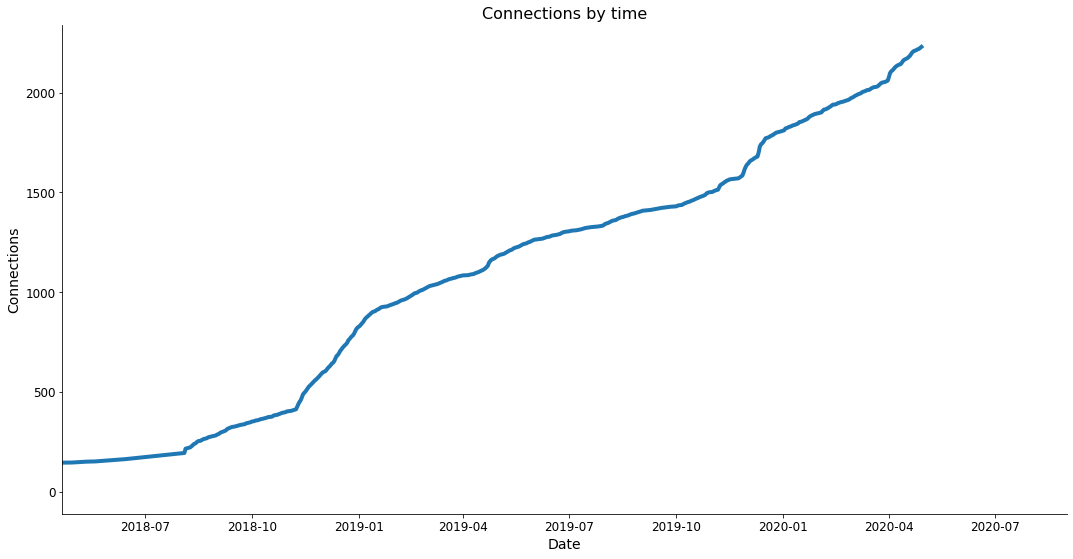

In [11]:
df_pos_time_line = df_connections [['Connected On']]
df_pos_time_line['Connected On']= pd.to_datetime(df_pos_time_line['Connected On']) 
df_pos_time_line.dropna(axis =0,inplace = True)
df_pos_time_line.sort_values (by = ['Connected On'],inplace = True,ascending = True)
df_pos_time_line.reset_index (inplace = True,drop = True)


index = df_pos_time_line.index.values

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f7ea1f","#f7801f"]
palette = sns.color_palette(flatui)
import datetime
plt.figure (figsize = (18,9))
ax = sns.lineplot (data = df_pos_time_line,x='Connected On',y=index,linewidth=4)

ax.set_xlim([datetime.date(2018, 4, 21), datetime.date(2020, 9, 1)])

plt.title ('Connections by time',fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel ('Connections',fontsize=14)
ax.set_xlabel('Date',fontsize=14)
ax.tick_params(labelsize=12)

# Connections by request types

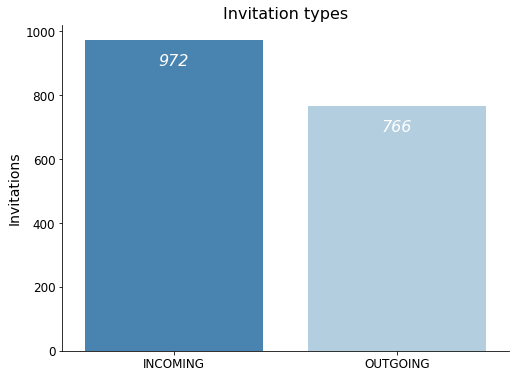

In [18]:
df_count = pd.DataFrame (df_invitations['Direction'].value_counts())
df_count.reset_index(inplace = True)
plt.figure (figsize = (8,6))
ax = sns.barplot (data = df_count,x='index',y='Direction',palette= reversed(sns.color_palette("Blues",n_colors=2)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title ('Invitation types',fontsize = 16)
ax.set_ylabel ('Invitations',fontsize=14)
ax.set_xlabel(None,fontsize=14)
ax.tick_params(labelsize=12)

for i,index in enumerate (df_count.index):
        label = df_count.loc [index,'Direction']
        ax.text(i,label-80, round(label, 2), color='white', ha="center",style = 'oblique',fontsize=16)

### and this is it!
# feel free to say a hello : https://www.linkedin.com/in/moeinnikpour/
